# Bank Customer Churn Analyse

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# visualisação dos dados 
dataset = pd.read_csv('BankCustomerChurn.csv')
display(dataset)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [4]:
dataset.describe()  

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
dataset.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

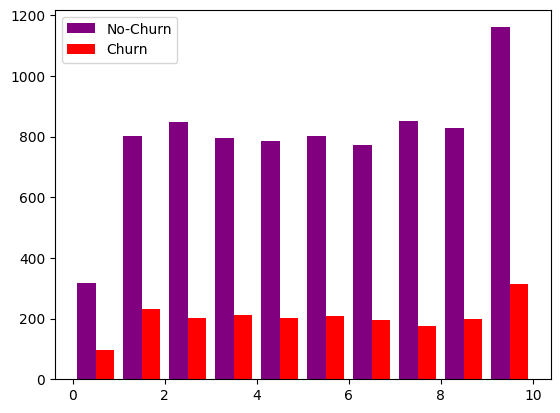

In [6]:
#quantidade de clientes em churn por tempo 
dfNo = dataset[dataset.churn == 0].tenure
dfYes = dataset[dataset.churn == 1].tenure

plt.hist([dfNo, dfYes], color = ['purple', 'red'], label = ['No-Churn', 'Churn'])
plt.legend()
plt.show()

In [7]:
dataset['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

<p>Com esse gráfico de barras é possível identificar que há variações de crescimento de clientes em churn durante um período de 10 mesês</p>

NO: 7963 YES: 2037 churn: 20.37%


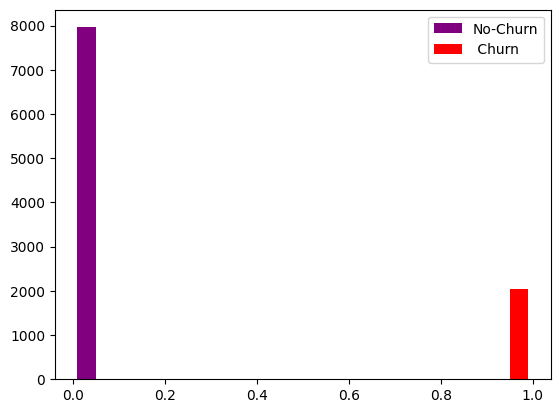

In [8]:
# análise de balanciamento dos dados 
dfNo = dataset[dataset.churn== 0].churn
dfYes = dataset[dataset.churn == 1].churn

total = dfNo.count() + dfYes.count()
percent = round((dfYes.count() / total) *100,2)

print(f'NO: {dfNo.count()}', f'YES: {dfYes.count()}', f'churn: {percent}%')

plt.hist([dfNo, dfYes], color = ['purple', 'red'], label = ['No-Churn', ' Churn'])
plt.legend()
plt.show()

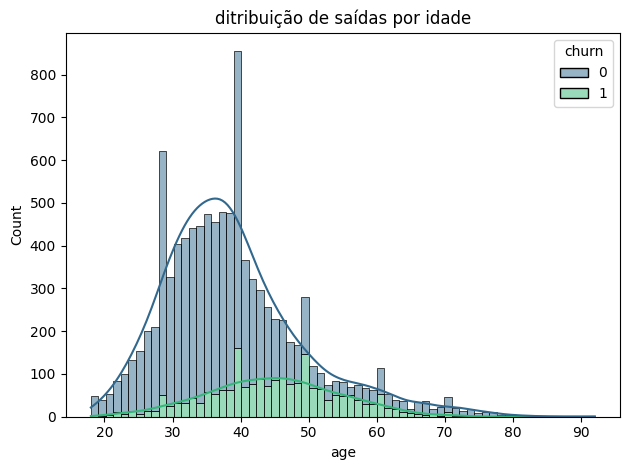

In [9]:
# distribuição de saida por idade com seaborn 
sns.histplot (data =  dataset, x = 'age', hue = 'churn', multiple = "stack", kde=True, palette="viridis")
plt.title("ditribuição de saídas por idade")

plt.tight_layout()
plt.show()